# Notebook #5
## Ha sido creado con el fin de hacer análisis identificados en conjunto con Lucas

<font color="red">
Varias cosas q se pretendían hacer en éste, se lograron en otro notebook: "Adaptab_python5.2"
</font>


Se parte de base de datos depurada en notebooks previos (sin Cartagena y los dos de Armenia y Manizales

Dicha base de datos se llama "adapta_junio29"

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path=("/Users/alejandronaranjo/OneDrive - Universidad de San Buenaventura Medellín/03. Investigación/08 Inv. Adaptabilidad/06 Python_adaptab/01 Datos")
os.listdir(path)
os.chdir(path)

In [4]:
ls

BaseCSV_adap_complem.csv           Sens_Ciudad_Sexo.png
BaseCSV_adap_orig.csv              SensacPref_RelacVotosNormaliz.png
CSV_SinCartagena.csv               SensacRelacVotosNormaliz.png
PrefRelacVotosNormaliz.png         VotosNormalizadosSuma.csv
Pref_Ciudad_Sexo.png               adapta_junio29.csv
ProcesamDatos_4Nov2019.xlsx*       sensac_pref_orig.csv
SensPref_Temp_Ciudad.png


In [43]:
lucas = pd.read_csv("adapta_junio29.csv")
#lucas.info()
lucas.head()
lucas

,Unnamed: 0,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD
0,0,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,796.0,4.0,28.9,50.2
1,1,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,779.0,4.0,29.1,50.2
2,2,Armenia,F,23.0,1.0,0.5,-1.0,0.5,2.0,0.33,-2.0,0.33,530.0,4.0,29.2,50.7
3,3,Armenia,F,23.0,1.0,0.5,0.0,1.0,1.0,0.67,-1.0,0.67,622.0,4.0,29.4,50.0
4,4,Armenia,M,20.0,0.0,1.0,1.0,0.5,3.0,0.00,-1.0,0.67,202.0,2.0,28.9,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,1137,Medellín,M,21.0,-1.0,0.5,2.0,0.0,1.0,0.67,-2.0,0.33,36.0,1.0,26.5,66.1
1138,1138,Medellín,M,20.0,0.0,1.0,0.0,1.0,1.0,0.67,-1.0,0.67,-31.0,1.0,27.1,67.8
1139,1139,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,0.0,1.00,-23.0,1.0,26.7,68.9
1140,1140,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,-1.0,0.67,-47.0,1.0,26.5,68.6


# Análisis de sensación térmica en función de iluminancia

In [46]:
# crear DF necesarios

frio = lucas.loc[((lucas["SensaciónTérmica"] == -1) | 
                  (lucas["SensaciónTérmica"] == -2) | 
                  (lucas["SensaciónTérmica"] == -3) )]
#frio.describe()
frio

agradable = lucas.loc[lucas["SensaciónTérmica"]== 0]
agradable

calor = lucas.loc[((lucas["SensaciónTérmica"] == 1) | 
                  (lucas["SensaciónTérmica"] == 2) | 
                  (lucas["SensaciónTérmica"] == 3) )]
#calor.describe()
calor

,Unnamed: 0,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD
0,0,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,796.0,4.0,28.9,50.2
1,1,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,779.0,4.0,29.1,50.2
2,2,Armenia,F,23.0,1.0,0.5,-1.0,0.5,2.0,0.33,-2.0,0.33,530.0,4.0,29.2,50.7
3,3,Armenia,F,23.0,1.0,0.5,0.0,1.0,1.0,0.67,-1.0,0.67,622.0,4.0,29.4,50.0
4,4,Armenia,M,20.0,0.0,1.0,1.0,0.5,3.0,0.00,-1.0,0.67,202.0,2.0,28.9,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,1128,Medellín,F,18.0,-1.0,0.5,1.0,0.5,1.0,0.67,-2.0,0.33,75.0,1.0,27.6,63.2
1133,1133,Medellín,M,21.0,1.0,0.5,2.0,0.0,1.0,0.67,-1.0,0.67,36.0,1.0,27.6,63.2
1135,1135,Medellín,M,21.0,0.0,1.0,2.0,0.0,1.0,0.67,-1.0,0.67,36.0,1.0,26.7,68.9
1137,1137,Medellín,M,21.0,-1.0,0.5,2.0,0.0,1.0,0.67,-2.0,0.33,36.0,1.0,26.5,66.1


In [37]:
x=frio["TEMP"]
y=frio['EV_media']

palette = ["aquamarine", "black", "dimgray"]

#sns.lmplot(x="TEMP", y="EV_media", data=datos_sincar,
sns.lmplot(x,y, data=frio,
           fit_reg=False, hue='SensaciónTérmica', legend=True,
          palette=palette)#, markers=["o", "+", "x", "o", "+", "x", "o"])
 
#plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

#sns.set(font_scale=1.4)

plt.xlabel("Temperatura")
plt.ylabel("Iluminancia")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 432x288 with 0 Axes>

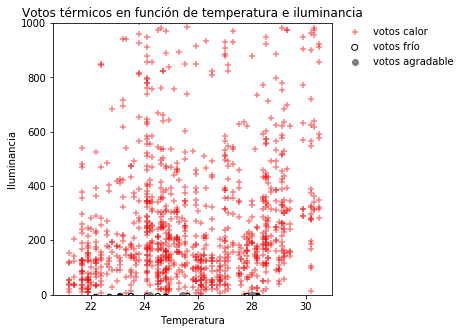

In [7]:
x=lucas["TEMP"]
y=lucas['EV_media']
c=lucas['SensaciónTérmica']

lucas = pd.DataFrame({'x': x, 'y': y})
# split dataframes
lucas_plus = lucas[lucas.y > 0]
lucas_zero = lucas[lucas.y == 0]
lucas_minus = lucas[lucas.y < 0]
#print (lucas_plus)
#print (lucas_minus)

fig = plt.figure()

fig,ax=plt.subplots(figsize=(5,5))

#ax = fig.add_subplot(1, 1, 1)


# plot scatter
ax.scatter(lucas_plus.x, lucas_plus.y, color='red',alpha=0.5, label ="votos calor", marker="+")
ax.scatter(lucas_minus.x, lucas_minus.y, c="None", edgecolors="k",linewidth=1, label ="votos frío", marker="o")
ax.scatter(lucas_zero.x, lucas_zero.y, color='grey', label ="votos agradable")
#ax.autoscale()

plt.title("Votos térmicos en función de temperatura e iluminancia")

plt.ylabel("Iluminancia")
plt.ylim(-1,1000)

plt.xlabel("Temperatura")
#plt.ylim(0,2000)

plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left',
           borderaxespad=0, frameon=False)

plt.show()


In [14]:
ensayo = lucas
ensayo.info()
ensayo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1142 non-null   int64  
 1   Ciudad                         1142 non-null   object 
 2   genero                         1142 non-null   object 
 3   edad                           1142 non-null   float64
 4   SensaciónVisual                1142 non-null   float64
 5   SensaciónVisualNormalizada     1142 non-null   float64
 6   PreferenciaVisual              1142 non-null   float64
 7   PreferenciaVisualNormalizado   1142 non-null   float64
 8   SensaciónTérmica               1142 non-null   float64
 9   SensaciónTérmicaNormalizada    1142 non-null   float64
 10  PreferenciaTérmica             1142 non-null   float64
 11  PreferenciaTérmicaNormalizado  1142 non-null   float64
 12  EV_media                       1142 non-null   f

,Unnamed: 0,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD
0,0,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,796.0,4.0,28.9,50.2
1,1,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,779.0,4.0,29.1,50.2
2,2,Armenia,F,23.0,1.0,0.5,-1.0,0.5,2.0,0.33,-2.0,0.33,530.0,4.0,29.2,50.7
3,3,Armenia,F,23.0,1.0,0.5,0.0,1.0,1.0,0.67,-1.0,0.67,622.0,4.0,29.4,50.0
4,4,Armenia,M,20.0,0.0,1.0,1.0,0.5,3.0,0.00,-1.0,0.67,202.0,2.0,28.9,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,1137,Medellín,M,21.0,-1.0,0.5,2.0,0.0,1.0,0.67,-2.0,0.33,36.0,1.0,26.5,66.1
1138,1138,Medellín,M,20.0,0.0,1.0,0.0,1.0,1.0,0.67,-1.0,0.67,-31.0,1.0,27.1,67.8
1139,1139,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,0.0,1.00,-23.0,1.0,26.7,68.9
1140,1140,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,-1.0,0.67,-47.0,1.0,26.5,68.6


In [33]:
ensayo['SensTermStr'] = ensayo['SensaciónTérmica'].astype(str)
ensayo.info()
ensayo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1142 non-null   int64  
 1   Ciudad                         1142 non-null   object 
 2   genero                         1142 non-null   object 
 3   edad                           1142 non-null   float64
 4   SensaciónVisual                1142 non-null   float64
 5   SensaciónVisualNormalizada     1142 non-null   float64
 6   PreferenciaVisual              1142 non-null   float64
 7   PreferenciaVisualNormalizado   1142 non-null   float64
 8   SensaciónTérmica               1142 non-null   float64
 9   SensaciónTérmicaNormalizada    1142 non-null   float64
 10  PreferenciaTérmica             1142 non-null   float64
 11  PreferenciaTérmicaNormalizado  1142 non-null   float64
 12  EV_media                       1142 non-null   f

,Unnamed: 0,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD,SensTermStr,SensTermStr2
0,0,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,796.0,4.0,28.9,50.2,2.0,2.0Armenia
1,1,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,779.0,4.0,29.1,50.2,2.0,2.0Armenia
2,2,Armenia,F,23.0,1.0,0.5,-1.0,0.5,2.0,0.33,-2.0,0.33,530.0,4.0,29.2,50.7,2.0,2.0Armenia
3,3,Armenia,F,23.0,1.0,0.5,0.0,1.0,1.0,0.67,-1.0,0.67,622.0,4.0,29.4,50.0,1.0,1.0Armenia
4,4,Armenia,M,20.0,0.0,1.0,1.0,0.5,3.0,0.00,-1.0,0.67,202.0,2.0,28.9,50.2,3.0,3.0Armenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,1137,Medellín,M,21.0,-1.0,0.5,2.0,0.0,1.0,0.67,-2.0,0.33,36.0,1.0,26.5,66.1,1.0,1.0Medellín
1138,1138,Medellín,M,20.0,0.0,1.0,0.0,1.0,1.0,0.67,-1.0,0.67,-31.0,1.0,27.1,67.8,1.0,1.0Medellín
1139,1139,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,0.0,1.00,-23.0,1.0,26.7,68.9,0.0,0.0Medellín
1140,1140,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,-1.0,0.67,-47.0,1.0,26.5,68.6,0.0,0.0Medellín


In [22]:
ensayo.describe()

,Unnamed: 0,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD
count,1142.00000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,570.50000,21.167250,-0.122592,0.729422,0.577933,0.619089,0.169877,0.757504,-0.560420,0.701515,342.154991,2.364273,25.692294,63.079422
std,329.81131,3.037172,0.807956,0.306076,0.893331,0.371302,1.148502,0.301717,1.195716,0.323638,430.540336,1.216474,2.437724,8.119837
min,0.00000,2.000000,-2.000000,0.000000,-2.000000,0.000000,-3.000000,0.000000,-3.000000,0.000000,-72.000000,1.000000,21.200000,49.200000
25%,285.25000,19.000000,-1.000000,0.500000,0.000000,0.500000,0.000000,0.670000,-1.000000,0.330000,89.500000,1.000000,24.100000,56.200000
50%,570.50000,21.000000,0.000000,1.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.670000,191.500000,2.000000,25.300000,63.200000
75%,855.75000,23.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,414.500000,3.000000,27.800000,68.400000
max,1141.00000,36.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3708.000000,5.000000,30.500000,84.000000


In [27]:
# crear DF necesarios

ensayofrio = ensayo.loc[((ensayo["SensTermStr"] == "-1") | 
                  (ensayo["SensTermStr"] == "-2") | 
                  (ensayo["SensTermStr"] == "-3"))]
#frio.describe()
ensayofrio

#ensayoagradable = ensayo.loc[ensayo["SensTermStr"]== "0"]
#ensayoagradable

#ensayocalor = ensayo.loc[((ensayo["SensTermStr"] == 1) | 
 #                 (ensayo["SensTermStr"] == 2) | 
  #                (ensayo["SensTermStr"] == 3) )]
#calor.describe()
#ensayocalor

,Unnamed: 0,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD,SensTermStr


In [28]:
ensayo ["SensTermStr2"] = ensayo["SensTermStr"]+ ensayo["Ciudad"]
ensayo
#sensac_pref_orig ["sens_vis_term_orig"] = sensac_pref_orig["P6 bien"].astype(str)+ sensac_pref_orig["P1.1"].astype(str)+ sensac_pref_orig["Rango_EV_media"].astype(str)


,Unnamed: 0,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD,SensTermStr,SensTermStr2
0,0,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,796.0,4.0,28.9,50.2,2.0,2.0Armenia
1,1,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,779.0,4.0,29.1,50.2,2.0,2.0Armenia
2,2,Armenia,F,23.0,1.0,0.5,-1.0,0.5,2.0,0.33,-2.0,0.33,530.0,4.0,29.2,50.7,2.0,2.0Armenia
3,3,Armenia,F,23.0,1.0,0.5,0.0,1.0,1.0,0.67,-1.0,0.67,622.0,4.0,29.4,50.0,1.0,1.0Armenia
4,4,Armenia,M,20.0,0.0,1.0,1.0,0.5,3.0,0.00,-1.0,0.67,202.0,2.0,28.9,50.2,3.0,3.0Armenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,1137,Medellín,M,21.0,-1.0,0.5,2.0,0.0,1.0,0.67,-2.0,0.33,36.0,1.0,26.5,66.1,1.0,1.0Medellín
1138,1138,Medellín,M,20.0,0.0,1.0,0.0,1.0,1.0,0.67,-1.0,0.67,-31.0,1.0,27.1,67.8,1.0,1.0Medellín
1139,1139,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,0.0,1.00,-23.0,1.0,26.7,68.9,0.0,0.0Medellín
1140,1140,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,-1.0,0.67,-47.0,1.0,26.5,68.6,0.0,0.0Medellín


In [29]:
ensayofrio = ensayo.loc[((ensayo["SensTermStr2"] == "-1") | 
                  (ensayo["SensTermStr2"] == "-2") | 
                  (ensayo["SensTermStr2"] == "-3"))]
#frio.describe()
ensayofrio

,Unnamed: 0,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD,SensTermStr,SensTermStr2


In [ ]:
ensayo['SensTermStr'] = ensayo['SensaciónTérmica'].astype(str)
ensayo.info()

In [38]:
ensayo["TempStr"] = ensayo["TEMP"].astype(str)
ensayo

#ter_vis2 = ter_vis2.reset_index()
del ensayo ["Unnamed: 0"]
ensayo

,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD,SensTermStr,SensTermStr2,TempStr
0,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,796.0,4.0,28.9,50.2,2.0,2.0Armenia,28.9
1,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,779.0,4.0,29.1,50.2,2.0,2.0Armenia,29.1
2,Armenia,F,23.0,1.0,0.5,-1.0,0.5,2.0,0.33,-2.0,0.33,530.0,4.0,29.2,50.7,2.0,2.0Armenia,29.2
3,Armenia,F,23.0,1.0,0.5,0.0,1.0,1.0,0.67,-1.0,0.67,622.0,4.0,29.4,50.0,1.0,1.0Armenia,29.4
4,Armenia,M,20.0,0.0,1.0,1.0,0.5,3.0,0.00,-1.0,0.67,202.0,2.0,28.9,50.2,3.0,3.0Armenia,28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,Medellín,M,21.0,-1.0,0.5,2.0,0.0,1.0,0.67,-2.0,0.33,36.0,1.0,26.5,66.1,1.0,1.0Medellín,26.5
1138,Medellín,M,20.0,0.0,1.0,0.0,1.0,1.0,0.67,-1.0,0.67,-31.0,1.0,27.1,67.8,1.0,1.0Medellín,27.1
1139,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,0.0,1.00,-23.0,1.0,26.7,68.9,0.0,0.0Medellín,26.7
1140,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,-1.0,0.67,-47.0,1.0,26.5,68.6,0.0,0.0Medellín,26.5


In [41]:

#agradable = lucas.loc[lucas["SensaciónTérmica"]== 0]
agradable

,Unnamed: 0,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD
7,7,Armenia,F,17.0,0.0,1.0,0.0,1.0,0.0,1.0,-2.0,0.33,384.0,3.0,28.9,50.2
8,8,Armenia,F,17.0,1.0,0.5,0.0,1.0,0.0,1.0,-2.0,0.33,329.0,3.0,29.1,50.2
9,9,Armenia,F,17.0,-2.0,0.0,0.0,1.0,0.0,1.0,-2.0,0.33,230.0,2.0,29.2,50.7
11,11,Armenia,M,20.0,0.0,1.0,0.0,1.0,0.0,1.0,-2.0,0.33,514.0,4.0,29.1,50.2
12,12,Armenia,M,20.0,-1.0,0.5,2.0,0.0,0.0,1.0,-2.0,0.33,324.0,3.0,29.2,50.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1134,Medellín,M,21.0,0.0,1.0,2.0,0.0,0.0,1.0,-1.0,0.67,36.0,1.0,27.1,67.8
1136,1136,Medellín,M,21.0,-1.0,0.5,2.0,0.0,0.0,1.0,-1.0,0.67,36.0,1.0,26.5,68.6
1139,1139,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.00,-23.0,1.0,26.7,68.9
1140,1140,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.0,-1.0,0.67,-47.0,1.0,26.5,68.6


In [55]:
calorselec = calor[["SensaciónTérmica","TEMP","EV_media"]]
calorselec

calorselec = calorselec.reset_index()

del calorselec['index']

calorselec

#sens_term_final = sens_term_final.reset_index()
# Elimino columna q queda como remanente con los index iniciales q traía c/u 
# de los DFs antes de concatenarse 



#armenia = datos_sincar.loc[datos_sincar["Ciudad"]== "Armenia"]
#armenia = armenia[["Ciudad","SensaciónTérmica",
 #                       "PreferenciaTérmica","TEMP","HUMEDAD"]]

#armeniamenos2 = armenia.loc[armenia["SensaciónTérmica"]== -2]
#print("Armenia -2")
#print(armeniamenos2.describe())

,SensaciónTérmica,TEMP,EV_media
0,2.0,28.9,796.0
1,2.0,29.1,779.0
2,2.0,29.2,530.0
3,1.0,29.4,622.0
4,3.0,28.9,202.0
...,...,...,...
310,1.0,27.6,75.0
311,1.0,27.6,36.0
312,1.0,26.7,36.0
313,1.0,26.5,36.0


KeyError: "None of [Float64Index([28.9, 29.1, 29.2, 29.4, 28.9, 29.1, 29.2, 29.4, 28.9, 29.1,\n              ...\n              23.5, 27.1, 27.6, 27.1, 26.7, 27.6, 27.6, 26.7, 26.5, 27.1],\n             dtype='float64', length=315)] are in the [columns]"

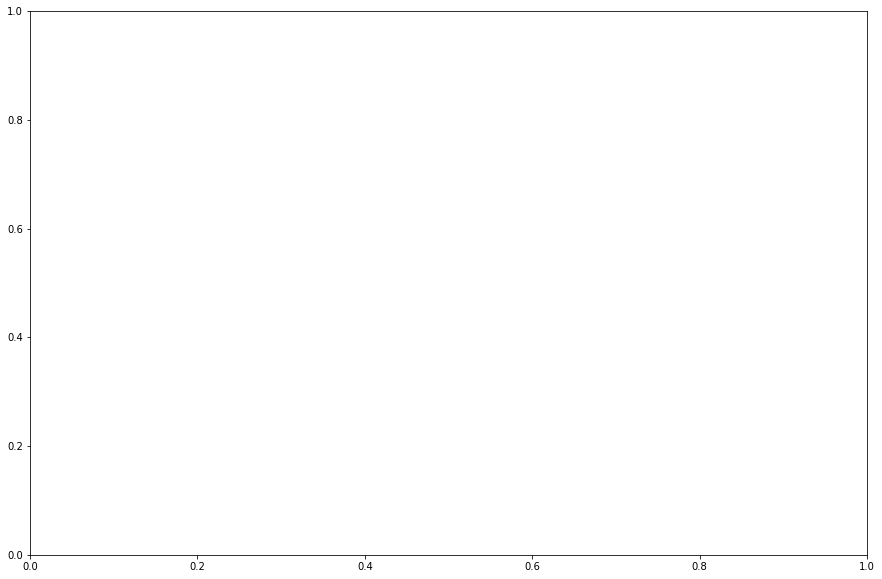

In [56]:
x=calorselec["TEMP"]
y=calorselec['EV_media']

calorselec.plot.scatter(x, y, c='SensaciónTérmica', figsize=(15,10));